In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)

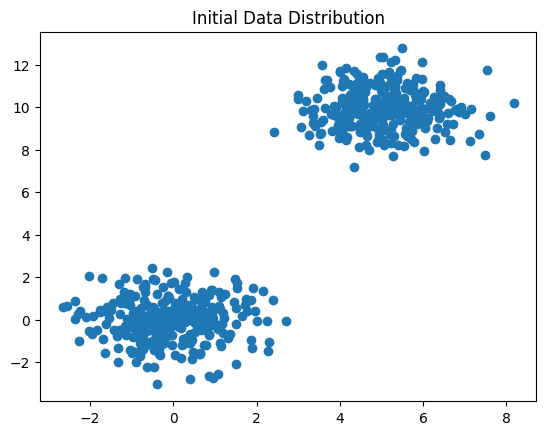

In [2]:
# 예시 데이터를 생성합니다.
np.random.seed(0)
data1 = np.random.randn(300, 2) + np.array([0, 0])
data2 = np.random.randn(300, 2) + np.array([5, 10])
data = np.vstack([data1, data2])

plt.scatter(data[:, 0], data[:, 1])
plt.title('Initial Data Distribution')
plt.show()


In [21]:
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()
boundary = (x_min, x_max, y_min, y_max)

In [17]:
def update_positions_with_boundary(positions, forces, dt=0.1, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max):
    new_positions = positions + forces * dt
    new_positions[:, 0] = np.clip(new_positions[:, 0], x_min, x_max)
    new_positions[:, 1] = np.clip(new_positions[:, 1], y_min, y_max)
    return new_positions


In [3]:
def compute_repulsive_force(point, data, radius=1.0):
    forces = np.zeros_like(point)
    for other_point in data:
        distance = np.linalg.norm(point - other_point)
        if 0 < distance < radius:
            force_magnitude = 1 / distance  # 거리의 역수에 비례하는 힘
            force_direction = (point - other_point) / distance
            forces += force_magnitude * force_direction
    return forces

fixed_force_field = np.array([compute_repulsive_force(point, data) for point in data])


In [22]:
def compute_boundary_force(point, boundary, boundary_radius=1.0):
    x_min, x_max, y_min, y_max = boundary
    forces = np.zeros_like(point)
    # Left boundary
    if point[0] - x_min < boundary_radius:
        distance = point[0] - x_min
        if distance > 0:
            forces[0] += 1 / distance
    
    # Right boundary
    if x_max - point[0] < boundary_radius:
        distance = x_max - point[0]
        if distance > 0:
            forces[0] -= 1 / distance
    
    # Bottom boundary
    if point[1] - y_min < boundary_radius:
        distance = point[1] - y_min
        if distance > 0:
            forces[1] += 1 / distance
    
    # Top boundary
    if y_max - point[1] < boundary_radius:
        distance = y_max - point[1]
        if distance > 0:
            forces[1] -= 1 / distance
    
    return forces


In [23]:
def compute_total_force(point, positions, boundary, particle_radius=1.0, boundary_radius=1.0):
    repulsive_force = compute_repulsive_force(point, positions, particle_radius)
    boundary_force = compute_boundary_force(point, boundary, boundary_radius)
    total_force = repulsive_force + boundary_force
    return total_force


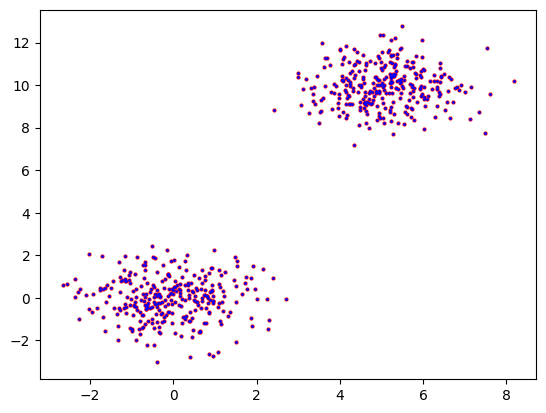

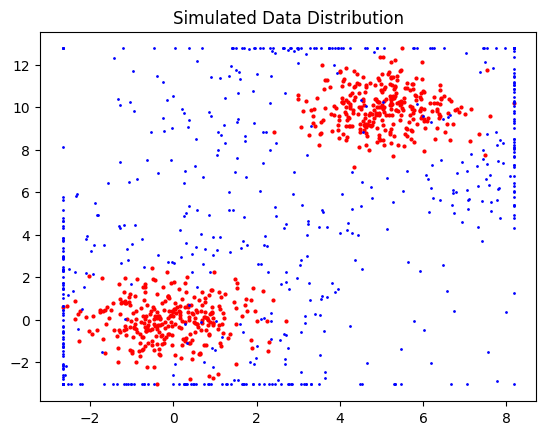

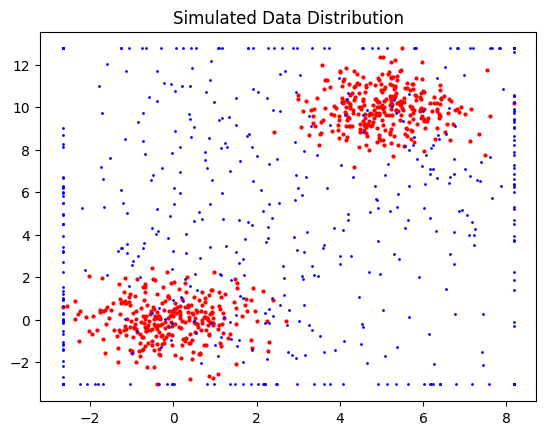

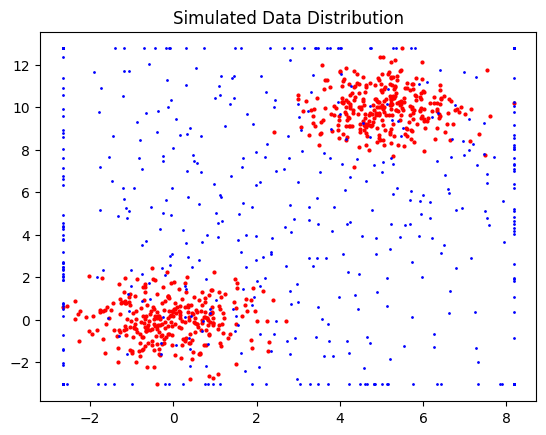

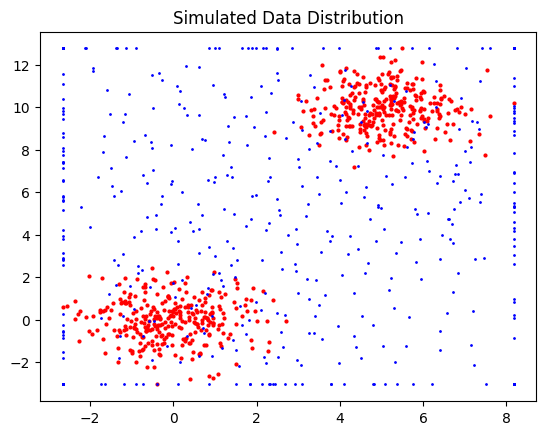

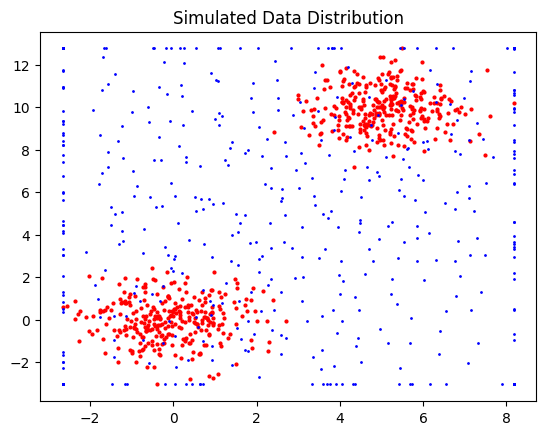

In [24]:
# def update_positions(positions, forces, dt=0.1):
#     return positions + forces * dt

positions = data.copy()
plt.scatter(data[:, 0], data[:, 1], s=4, c="red")
plt.scatter(positions[:, 0], positions[:, 1], s=1, c="blue")
plt.show()

for _ in range(5):  # 100번 iteration
    forces = np.array([compute_total_force(point, positions, boundary) for point in positions])
    positions = update_positions_with_boundary(positions, forces)

    plt.scatter(data[:, 0], data[:, 1], s=4, c="red")
    plt.scatter(positions[:, 0], positions[:, 1], s=1, c="blue")
    plt.title('Simulated Data Distribution')
    plt.show()


In [ ]:
def plot_level(level_bin_array, size1 = 2):
    gen_num = len(level_bin_array)
    rows = gen_num//10 + 1
    plt.figure(figsize=(size1*10, size1*rows))

    for i in range(len(level_bin_array)):
        plt.subplot(rows, 10, i+1)
        plt.title(f"gen : {i}")
        plt.axis("off")
        plt.imshow(level_bin_array[i][::-1], cmap='gray')

    plt.show()

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(0)
data1 = np.random.randn(300, 2) + np.array([0, 0])
data2 = np.random.randn(300, 2) + np.array([5, 10])
data = np.vstack([data1, data2])

# # 데이터 시각화
# plt.scatter(data[:, 0], data[:, 1])
# plt.title('Initial Data Distribution')
# plt.show()

# 직사각형 경계 설정

# 고정된 Force Field 함수
def compute_repulsive_force(point, data, radius=1.0):
    forces = np.zeros_like(point)
    for other_point in data:
        distance = np.linalg.norm(point - other_point)
        if 0 < distance < radius:
            force_magnitude = (1 / distance) # 거리의 역수에 비례하는 힘
            force_direction = (point - other_point) / distance
            forces += force_magnitude * force_direction
    return forces

# 경계에서의 척력 계산 함수
def compute_boundary_force(point, x_min, x_max, y_min, y_max, boundary_radius):
    forces = np.zeros_like(point)
    # Left boundary
    distance = point[0] - x_min
    if 0 < distance < boundary_radius:
        forces[0] += 1 / distance
    
    # Right boundary
    distance = x_max - point[0]
    if 0 < distance < boundary_radius:
        forces[0] -= 1 / distance
    
    # Bottom boundary
    distance = point[1] - y_min
    if 0 < distance < boundary_radius:
        forces[1] += 1 / distance
    
    # Top boundary
    distance = y_max - point[1]
    if 0 < distance < boundary_radius:
        forces[1] -= 1 / distance
    
    return forces

# 전체 Force 계산 함수
def compute_total_force(point, positions, x_min, x_max, y_min, y_max, particle_radius=1.0, boundary_radius=1.0):
    repulsive_force = compute_repulsive_force(point, positions, particle_radius)
    boundary_force = compute_boundary_force(point, x_min, x_max, y_min, y_max, boundary_radius)
    total_force = repulsive_force + boundary_force
    return total_force

# 경계 내 이동 제한 함수
def update_positions_with_boundary(positions, forces, boundary, dt=0.1):
    x_min, x_max, y_min, y_max = boundary
    new_positions = positions + forces * dt
    new_positions[:, 0] = np.clip(new_positions[:, 0], x_min, x_max)
    new_positions[:, 1] = np.clip(new_positions[:, 1], y_min, y_max)
    return new_positions

# 시뮬레이션 수행
# positions = data.copy()
# for _ in range(100):  # 100번 iteration
#     forces = np.array([compute_total_force(point, positions, x_min, x_max, y_min, y_max) for point in positions])
#     positions = update_positions_with_boundary(positions, forces)
    
#     plt.scatter(data[:, 0], data[:, 1], s=4, c="red")
#     plt.scatter(positions[:, 0], positions[:, 1], s=1, c="blue")
#     plt.title('Simulated Data Distribution')
#     plt.show()

In [72]:
def forcefield_simul(data, iteration):
    positions = data.copy()
    rows = iteration//5 + 1
    size = 5
    plt.figure(figsize=(size*10, size*rows))
    
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    boundary = (x_min, x_max, y_min, y_max)
    boundary_radius = (x_max - x_min)*(y_max - y_min)**0.5/5

    for i in range(iteration):
        forces = np.array([compute_total_force(point, positions, x_min, x_max, y_min, y_max) for point in positions])
        positions = update_positions_with_boundary(positions, forces, boundary, dt=0.1)
        
        plt.subplot(rows, 10, i+1)
        plt.scatter(data[:, 0], data[:, 1], s=4, c="red")
        plt.scatter(positions[:, 0], positions[:, 1], s=4, c="blue")
        plt.axis("off")

    plt.show()

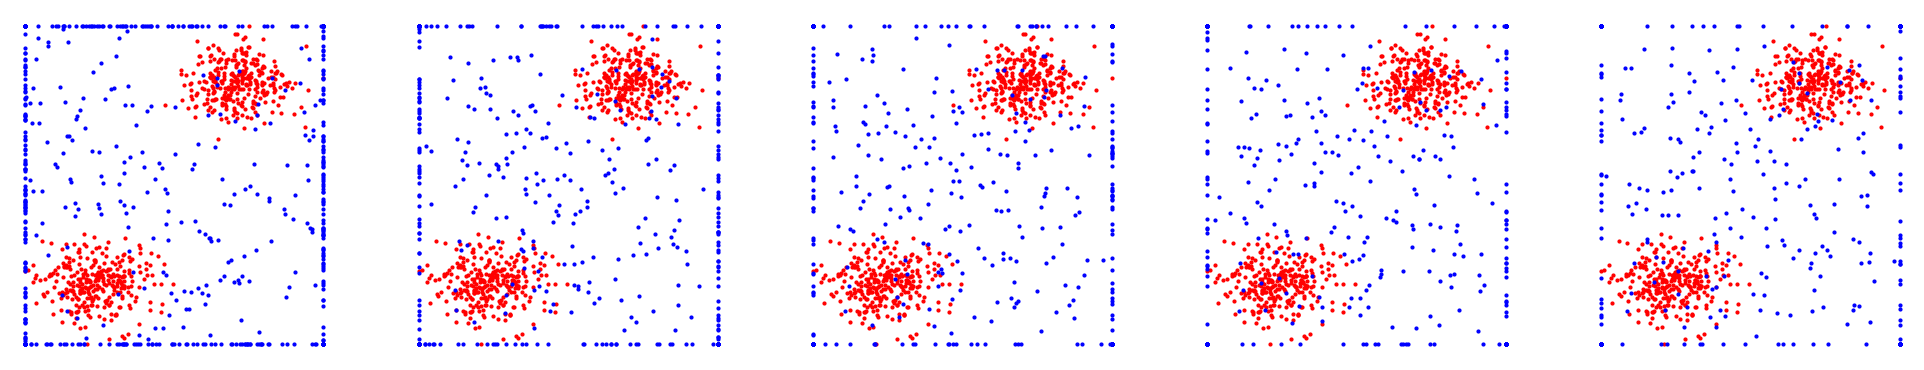

In [73]:
forcefield_simul(data, 5)

In [74]:
X1 = make_circles(factor=0.5, noise=0.05, n_samples=500)[0]
X2 = make_moons(n_samples=500, noise=0.05)[0]
X3 = make_blobs(n_samples=500, random_state=42, cluster_std=3)[0]

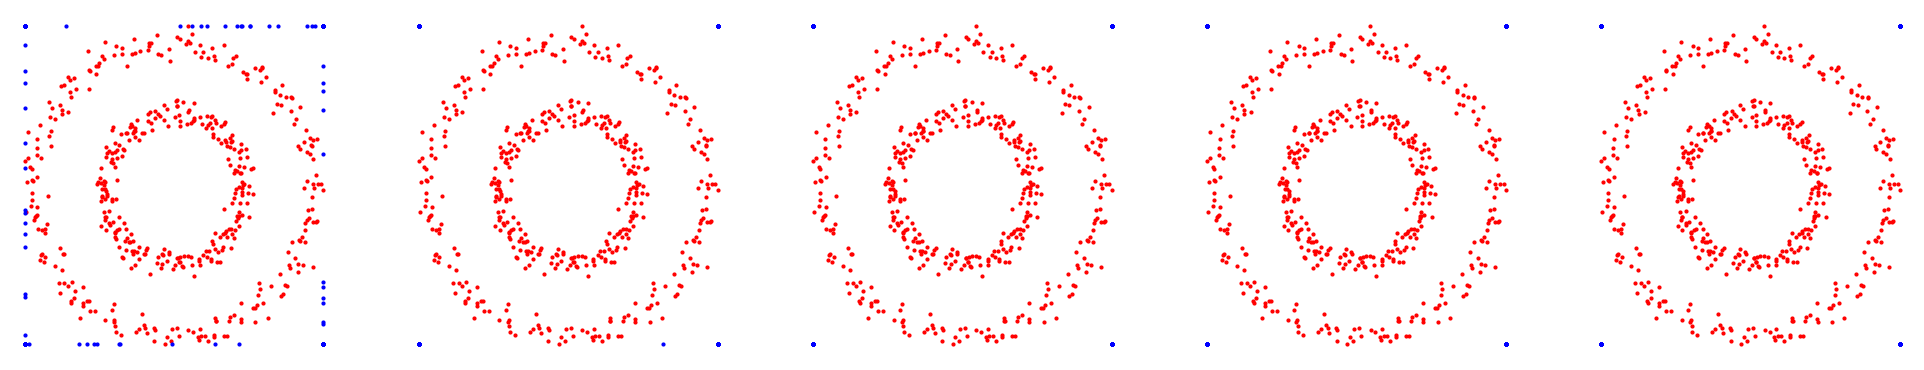

In [77]:
forcefield_simul(X1, 5)